In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_excel("Bank_Credit.xlsx", "Train")
df_test = pd.read_excel("Bank_Credit.xlsx", "Test")

In [14]:
df_train.shape

(98960, 12)

In [16]:
df_test.shape

(1000, 12)

In [44]:
df = pd.concat([df_train, df_test])

In [45]:
df.head()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Credit_Score
0,1001,39.0,9983.345,758.945417,15.0,Standard,1823.35,36.988288,NM,29.241519,261.655481,Poor
1,1002,39.0,9983.345,758.945417,15.0,Standard,1823.35,29.509423,Yes,29.241519,278.471002,Poor
2,1003,39.0,9983.345,758.945417,15.0,Standard,1823.35,39.637756,Yes,29.241519,279.003809,Standard
3,1004,39.0,9983.345,758.945417,15.0,Standard,1823.35,26.611978,NM,29.241519,264.273127,Standard
4,1005,39.0,9983.345,758.945417,15.0,Standard,1823.35,30.274878,Yes,29.241519,277.741459,Standard


# EDA

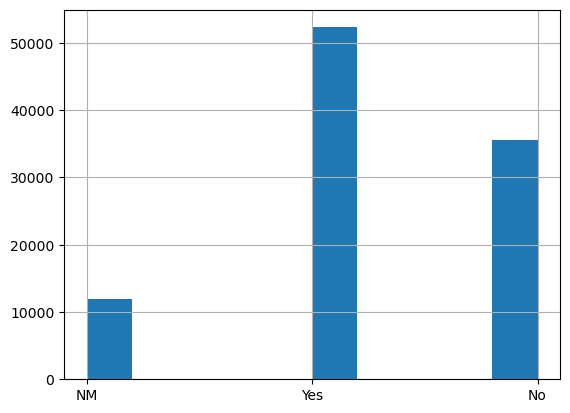

In [60]:
df['Payment_of_Min_Amount'].hist()
plt.show()

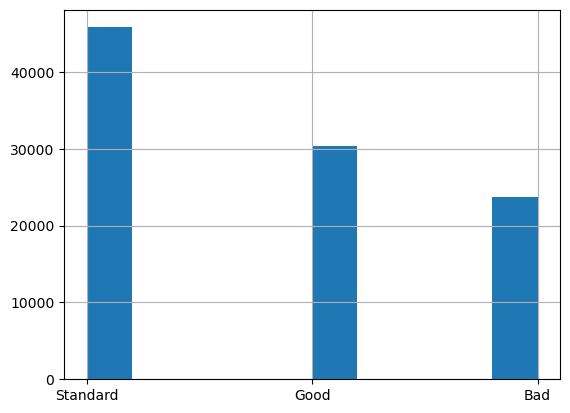

In [62]:
df['Credit_Mix'].hist()
plt.show()

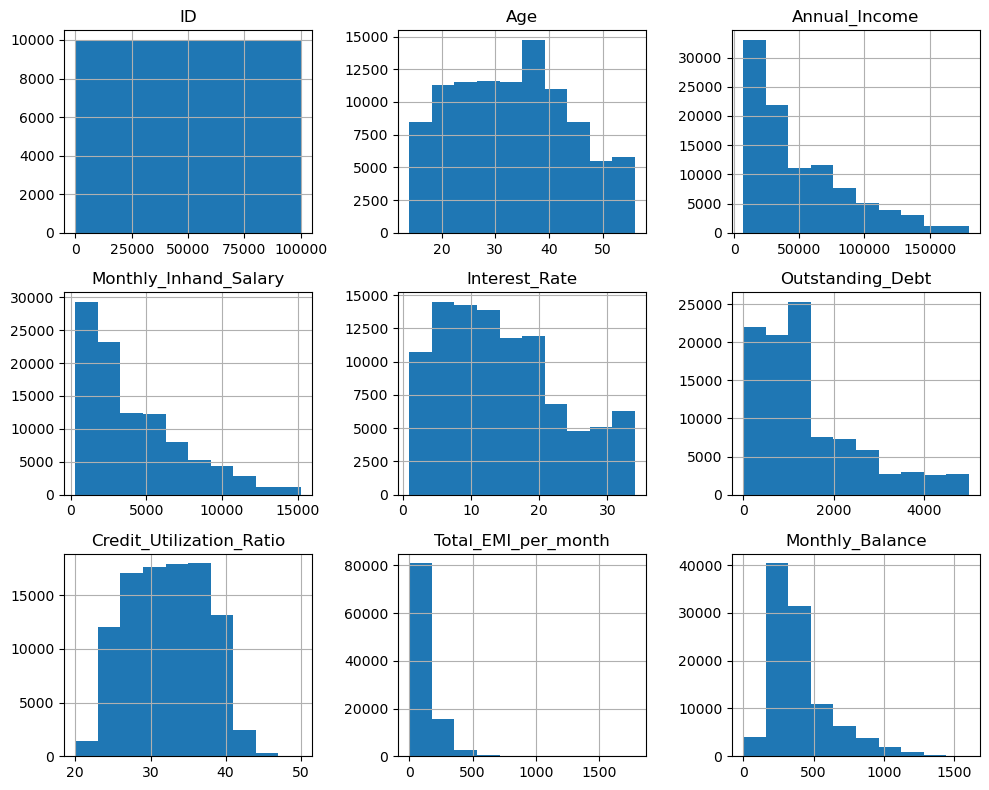

In [61]:
# Distributed for Numerical columns
df.hist(figsize=(10, 8))
plt.tight_layout() 
plt.show()

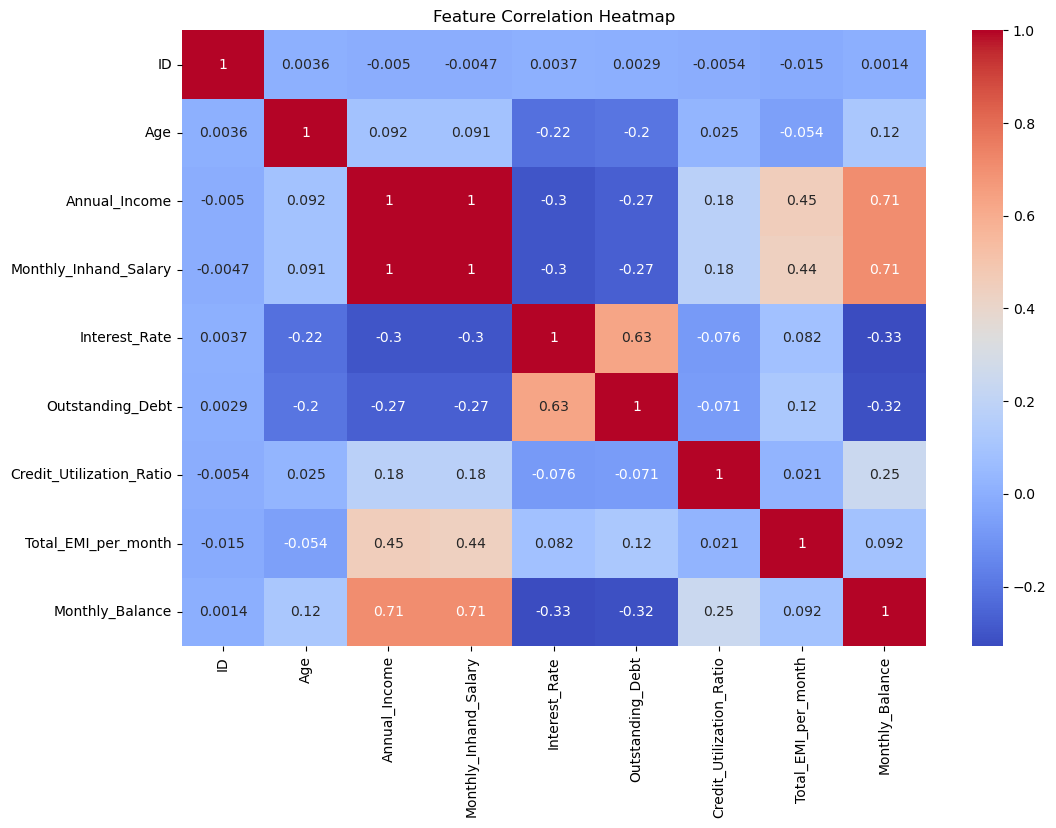

In [58]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Preprocessing

In [63]:
df.isnull().sum()

ID                           0
Age                         36
Annual_Income               53
Monthly_Inhand_Salary        5
Interest_Rate                5
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Monthly_Balance              0
Credit_Score                 0
dtype: int64

In [65]:
df.dropna(inplace = True)

In [67]:
df

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Credit_Score
0,1001,39.0,9983.345,758.945417,15.0,Standard,1823.35,36.988288,NM,29.241519,261.655481,Poor
1,1002,39.0,9983.345,758.945417,15.0,Standard,1823.35,29.509423,Yes,29.241519,278.471002,Poor
2,1003,39.0,9983.345,758.945417,15.0,Standard,1823.35,39.637756,Yes,29.241519,279.003809,Standard
3,1004,39.0,9983.345,758.945417,15.0,Standard,1823.35,26.611978,NM,29.241519,264.273127,Standard
4,1005,39.0,9983.345,758.945417,15.0,Standard,1823.35,30.274878,Yes,29.241519,277.741459,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,27.0,63536.980,5382.748333,12.0,Standard,89.62,37.015380,NM,69.100853,230.838988,Standard
996,997,27.0,63536.980,5382.748333,12.0,Standard,89.62,37.389860,Yes,69.100853,440.918231,Standard
997,998,27.0,63536.980,5382.748333,12.0,Standard,89.62,34.811491,Yes,69.100853,287.535792,Standard
998,999,27.0,63536.980,5382.748333,12.0,Standard,89.62,40.064787,Yes,69.100853,568.135110,Standard


In [64]:
df.duplicated().sum()

0

# Encoding Categorical Columns [Credit_Mix, Payment_of_Min_Amount, Credit_Score] for training and testing data

# OrdinalEncoding for ordinal features [Credit_Mix, Credit_Score]

In [108]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# encode Credit_Mix
Credit_Mix = df[['Credit_Mix']]
ordinal_encoder = OrdinalEncoder(categories=[['Bad', 'Standard', 'Good']])
encoded_Credit_Mix = ordinal_encoder.fit_transform(Credit_Mix)
# encode Credit_Score
Credit_Score = df[['Credit_Score']]
ordinal_encoder = OrdinalEncoder(categories=[['Poor', 'Standard', 'Good']])
encoded_Credit_Score = ordinal_encoder.fit_transform(Credit_Score)

# One-Hot Encoding for Nominal Feature [Payment_of_Min_Amount]

In [111]:
Payment_of_Min_Amount = df[['Payment_of_Min_Amount']]
onehot_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
encoded_Payment_of_Min_Amount = onehot_encoder.fit_transform(Payment_of_Min_Amount)

In [217]:
encoded_Payment_of_Min_Amount

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [74]:
df1 = df.copy()

In [79]:
df1.drop(columns = ['Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score'], axis = 1, inplace = True)

In [81]:
df1

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance
0,1001,39.0,9983.345,758.945417,15.0,1823.35,36.988288,29.241519,261.655481
1,1002,39.0,9983.345,758.945417,15.0,1823.35,29.509423,29.241519,278.471002
2,1003,39.0,9983.345,758.945417,15.0,1823.35,39.637756,29.241519,279.003809
3,1004,39.0,9983.345,758.945417,15.0,1823.35,26.611978,29.241519,264.273127
4,1005,39.0,9983.345,758.945417,15.0,1823.35,30.274878,29.241519,277.741459
...,...,...,...,...,...,...,...,...,...
995,996,27.0,63536.980,5382.748333,12.0,89.62,37.015380,69.100853,230.838988
996,997,27.0,63536.980,5382.748333,12.0,89.62,37.389860,69.100853,440.918231
997,998,27.0,63536.980,5382.748333,12.0,89.62,34.811491,69.100853,287.535792
998,999,27.0,63536.980,5382.748333,12.0,89.62,40.064787,69.100853,568.135110


In [87]:
c1 = pd.DataFrame(encoded_Credit_Mix, columns = ['encoded_Credit_Mix'])
df1['Credit_Mix'] = c1
c2 = pd.DataFrame(encoded_Credit_Score, columns = ['encoded_Credit_Score'])
df1['Credit_Score'] = c2
c3 = pd.DataFrame(encoded_Payment_of_Min_Amount, columns = ['Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_NM'])
c3

In [121]:
df1['Payment_of_Min_Amount_Yes'] = c3['Payment_of_Min_Amount_Yes']
df1['Payment_of_Min_Amount_No'] = c3['Payment_of_Min_Amount_No']
df1['Payment_of_Min_Amount_NM'] = c3['Payment_of_Min_Amount_NM']

In [128]:
df1.head()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix,Credit_Score,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No,Payment_of_Min_Amount_NM
0,1001,39.0,9983.345,758.945417,15.0,1823.35,36.988288,29.241519,261.655481,1.0,0.0,1.0,0.0,0.0
1,1002,39.0,9983.345,758.945417,15.0,1823.35,29.509423,29.241519,278.471002,1.0,0.0,0.0,0.0,1.0
2,1003,39.0,9983.345,758.945417,15.0,1823.35,39.637756,29.241519,279.003809,1.0,1.0,0.0,0.0,1.0
3,1004,39.0,9983.345,758.945417,15.0,1823.35,26.611978,29.241519,264.273127,1.0,1.0,1.0,0.0,0.0
4,1005,39.0,9983.345,758.945417,15.0,1823.35,30.274878,29.241519,277.741459,1.0,1.0,0.0,0.0,1.0


In [131]:
df1.columns

Index(['ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Monthly_Balance', 'Credit_Mix', 'Credit_Score',
       'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_NM'],
      dtype='object')

# Featrue Engineering

In [227]:
df_final = df2[df2['Payment_of_Min_Amount_NM'] == 0]

In [231]:
df_final

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix,Credit_Score,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No
0,1001,39.0,9983.345,758.945417,15.0,1823.35,36.988288,29.241519,261.655481,1.0,0.0,1.0,0.0
3,1004,39.0,9983.345,758.945417,15.0,1823.35,26.611978,29.241519,264.273127,1.0,1.0,1.0,0.0
15,1016,15.0,27796.420,2300.368333,16.0,1073.94,33.988442,36.067631,387.601315,1.0,1.0,1.0,0.0
16,1017,30.0,132872.720,11203.726667,10.0,89.68,33.451349,144.830682,882.419120,2.0,2.0,0.0,1.0
17,1018,30.0,132872.720,11203.726667,10.0,89.68,42.397884,144.830682,779.625186,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,976,36.0,18717.020,1294.751667,15.0,2103.99,29.050667,60.646993,292.107724,2.0,2.0,0.0,1.0
977,978,17.0,19163.220,1346.935000,7.0,2226.37,35.680574,24.175648,234.782981,1.0,0.0,1.0,0.0
980,981,17.0,19163.220,1346.935000,7.0,2226.37,35.981596,24.175648,336.715366,1.0,1.0,1.0,0.0
981,982,17.0,19163.220,1346.935000,7.0,2226.37,36.349179,24.175648,288.791552,1.0,1.0,1.0,0.0


In [234]:
# we do not need ID column, because this column is a unique identifier for each row
df_final.drop('ID', axis = 1, inplace = True)
df_final.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_39472\991157964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop('ID', axis = 1, inplace = True)


,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix,Credit_Score,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No
0,39.0,9983.345,758.945417,15.0,1823.35,36.988288,29.241519,261.655481,1.0,0.0,1.0,0.0
3,39.0,9983.345,758.945417,15.0,1823.35,26.611978,29.241519,264.273127,1.0,1.0,1.0,0.0
15,15.0,27796.420,2300.368333,16.0,1073.94,33.988442,36.067631,387.601315,1.0,1.0,1.0,0.0
16,30.0,132872.720,11203.726667,10.0,89.68,33.451349,144.830682,882.419120,2.0,2.0,0.0,1.0
17,30.0,132872.720,11203.726667,10.0,89.68,42.397884,144.830682,779.625186,2.0,2.0,0.0,1.0


In [235]:
df_final

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix,Credit_Score,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No
0,39.0,9983.345,758.945417,15.0,1823.35,36.988288,29.241519,261.655481,1.0,0.0,1.0,0.0
3,39.0,9983.345,758.945417,15.0,1823.35,26.611978,29.241519,264.273127,1.0,1.0,1.0,0.0
15,15.0,27796.420,2300.368333,16.0,1073.94,33.988442,36.067631,387.601315,1.0,1.0,1.0,0.0
16,30.0,132872.720,11203.726667,10.0,89.68,33.451349,144.830682,882.419120,2.0,2.0,0.0,1.0
17,30.0,132872.720,11203.726667,10.0,89.68,42.397884,144.830682,779.625186,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
975,36.0,18717.020,1294.751667,15.0,2103.99,29.050667,60.646993,292.107724,2.0,2.0,0.0,1.0
977,17.0,19163.220,1346.935000,7.0,2226.37,35.680574,24.175648,234.782981,1.0,0.0,1.0,0.0
980,17.0,19163.220,1346.935000,7.0,2226.37,35.981596,24.175648,336.715366,1.0,1.0,1.0,0.0
981,17.0,19163.220,1346.935000,7.0,2226.37,36.349179,24.175648,288.791552,1.0,1.0,1.0,0.0


# Handling Outliers

<Figure size 1000x1000 with 0 Axes>

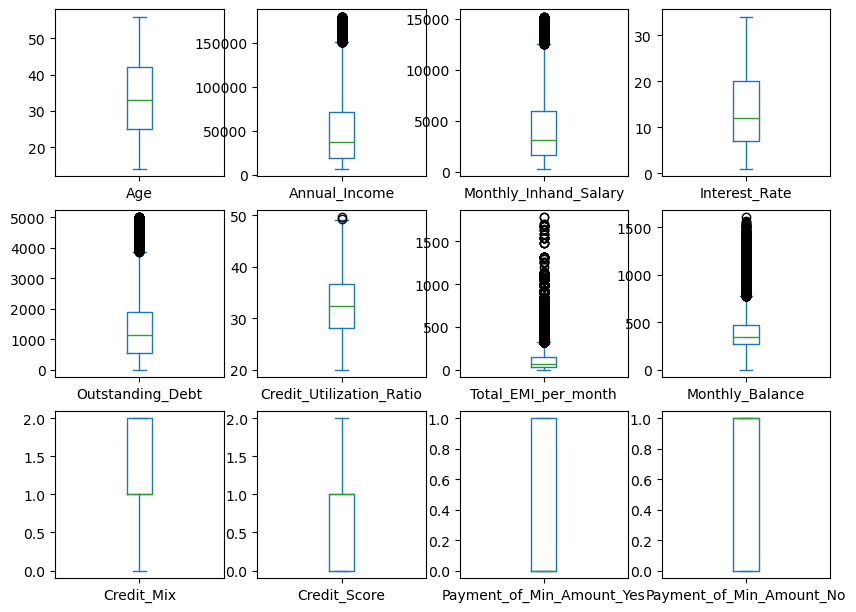

In [239]:
df_final.plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10))
plt.show()

In [240]:
df_1 = df_final.copy()

# There are 6 columns have outliers [Annual_Income, Monthly_Inhand_Salary, Outstanding_Debt, Credit_Utilization_Ratio, Total_EMI_per_month,	Monthly_Balance]

In [241]:
# Finding Outliers
# Calculate Q1 and Q3
Q1 = df_1.quantile(0.25)
Q3 = df_1.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Make a dataset with the outliers
IQR_outliers = df_1[((df_1 < (Q1 - 1.5 * IQR)) |(df_1 > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix,Credit_Score,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No
16,30.0,132872.72,11203.726667,10.0,89.68,33.451349,144.830682,882.419120,2.0,2.0,0.0,1.0
17,30.0,132872.72,11203.726667,10.0,89.68,42.397884,144.830682,779.625186,2.0,2.0,0.0,1.0
18,30.0,132872.72,11203.726667,10.0,89.68,41.341886,144.830682,956.666865,2.0,2.0,0.0,1.0
21,30.0,132872.72,11203.726667,10.0,89.68,40.081505,144.830682,992.223617,2.0,2.0,0.0,1.0
23,30.0,132872.72,11203.726667,10.0,89.68,29.550059,144.830682,1042.031182,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
963,42.0,57610.32,4517.860000,25.0,4428.64,37.085196,256.234179,399.521695,2.0,1.0,0.0,1.0
964,42.0,57610.32,4517.860000,25.0,4428.64,27.246402,256.234179,278.947440,2.0,0.0,0.0,1.0
965,42.0,57610.32,4517.860000,25.0,4428.64,24.537381,256.234179,60.537796,2.0,0.0,0.0,1.0
966,42.0,57610.32,4517.860000,25.0,4428.64,32.657467,256.234179,377.496214,2.0,0.0,0.0,1.0


In [244]:
# Remove outliers
df_without_outliers = df_1[~((df_1 < (Q1 - 1.5 * IQR)) |(df_1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [245]:
df_without_outliers

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix,Credit_Score,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No
0,39.0,9983.345,758.945417,15.0,1823.35,36.988288,29.241519,261.655481,1.0,0.0,1.0,0.0
3,39.0,9983.345,758.945417,15.0,1823.35,26.611978,29.241519,264.273127,1.0,1.0,1.0,0.0
15,15.0,27796.420,2300.368333,16.0,1073.94,33.988442,36.067631,387.601315,1.0,1.0,1.0,0.0
19,30.0,132872.720,11203.726667,10.0,89.68,29.357153,144.830682,352.370946,2.0,2.0,0.0,1.0
20,30.0,132872.720,11203.726667,10.0,89.68,27.622934,144.830682,731.499041,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
975,36.0,18717.020,1294.751667,15.0,2103.99,29.050667,60.646993,292.107724,2.0,2.0,0.0,1.0
977,17.0,19163.220,1346.935000,7.0,2226.37,35.680574,24.175648,234.782981,1.0,0.0,1.0,0.0
980,17.0,19163.220,1346.935000,7.0,2226.37,35.981596,24.175648,336.715366,1.0,1.0,1.0,0.0
981,17.0,19163.220,1346.935000,7.0,2226.37,36.349179,24.175648,288.791552,1.0,1.0,1.0,0.0


In [246]:
df = df_without_outliers

In [247]:
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix,Credit_Score,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No
0,39.0,9983.345,758.945417,15.0,1823.35,36.988288,29.241519,261.655481,1.0,0.0,1.0,0.0
3,39.0,9983.345,758.945417,15.0,1823.35,26.611978,29.241519,264.273127,1.0,1.0,1.0,0.0
15,15.0,27796.420,2300.368333,16.0,1073.94,33.988442,36.067631,387.601315,1.0,1.0,1.0,0.0
19,30.0,132872.720,11203.726667,10.0,89.68,29.357153,144.830682,352.370946,2.0,2.0,0.0,1.0
20,30.0,132872.720,11203.726667,10.0,89.68,27.622934,144.830682,731.499041,2.0,1.0,0.0,1.0


# MinMax Scaling for the numerical columns

In [248]:
df1 = df.drop("Credit_Score", axis = 1)

In [249]:
df1

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No
0,39.0,9983.345,758.945417,15.0,1823.35,36.988288,29.241519,261.655481,1.0,1.0,0.0
3,39.0,9983.345,758.945417,15.0,1823.35,26.611978,29.241519,264.273127,1.0,1.0,0.0
15,15.0,27796.420,2300.368333,16.0,1073.94,33.988442,36.067631,387.601315,1.0,1.0,0.0
19,30.0,132872.720,11203.726667,10.0,89.68,29.357153,144.830682,352.370946,2.0,0.0,1.0
20,30.0,132872.720,11203.726667,10.0,89.68,27.622934,144.830682,731.499041,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
975,36.0,18717.020,1294.751667,15.0,2103.99,29.050667,60.646993,292.107724,2.0,0.0,1.0
977,17.0,19163.220,1346.935000,7.0,2226.37,35.680574,24.175648,234.782981,1.0,1.0,0.0
980,17.0,19163.220,1346.935000,7.0,2226.37,35.981596,24.175648,336.715366,1.0,1.0,0.0
981,17.0,19163.220,1346.935000,7.0,2226.37,36.349179,24.175648,288.791552,1.0,1.0,0.0


In [250]:
from sklearn.preprocessing import MinMaxScaler
scale_minmax = MinMaxScaler(feature_range = (0,1))
scaled_df = scale_minmax.fit_transform(df1) # data without categorical features
df = pd.DataFrame(scaled_df, columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Monthly_Balance', 'Credit_Mix',
       'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_No']) # scaled data

In [255]:
c = df_without_outliers['Credit_Score']

In [258]:
p = pd.DataFrame(c)

In [259]:
p

,Credit_Score
0,0.0
3,1.0
15,1.0
19,2.0
20,1.0
...,...
975,2.0
977,0.0
980,1.0
981,1.0


In [261]:
r = p.reset_index(drop = True)

In [262]:
r

,Credit_Score
0,0.0
1,1.0
2,1.0
3,2.0
4,1.0
...,...
39379,2.0
39380,0.0
39381,1.0
39382,1.0


In [263]:
df['Credit_Score'] = r['Credit_Score']

In [264]:
df

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No,Credit_Score
0,0.595238,0.020731,0.037287,0.424242,0.470743,0.705686,0.091196,0.335725,0.5,1.0,0.0,0.0
1,0.595238,0.020731,0.037287,0.424242,0.470743,0.252492,0.091196,0.339089,0.5,1.0,0.0,1.0
2,0.023810,0.144761,0.163521,0.454545,0.277240,0.574665,0.112485,0.497583,0.5,1.0,0.0,1.0
3,0.380952,0.876390,0.892660,0.272727,0.023097,0.372389,0.451687,0.452307,1.0,0.0,1.0,2.0
4,0.380952,0.876390,0.892660,0.272727,0.023097,0.296646,0.451687,0.939539,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39379,0.523810,0.081542,0.081166,0.424242,0.543206,0.359003,0.189141,0.374860,1.0,0.0,1.0,2.0
39380,0.071429,0.084649,0.085440,0.181818,0.574805,0.648570,0.075397,0.301190,0.5,1.0,0.0,0.0
39381,0.071429,0.084649,0.085440,0.181818,0.574805,0.661718,0.075397,0.432187,0.5,1.0,0.0,1.0
39382,0.071429,0.084649,0.085440,0.181818,0.574805,0.677772,0.075397,0.370599,0.5,1.0,0.0,1.0


# Handling Imbalance

In [265]:
df["Credit_Score"].value_counts()

1.0    20797
0.0    11316
2.0     7271
Name: Credit_Score, dtype: int64

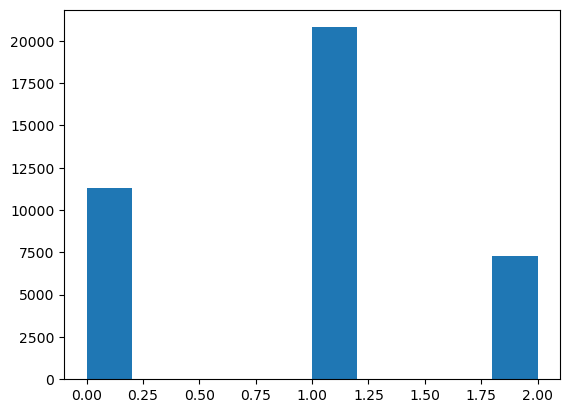

In [266]:
plt.hist(df["Credit_Score"])
plt.show()

In [165]:
df3 = df.copy()
df3.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix,Credit_Score,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No,Payment_of_Min_Amount_NM
1,0.595238,0.017212,0.030555,0.424242,0.364782,0.316981,0.016436,0.173819,0.5,0.0,0.0,0.0,1.0
2,0.595238,0.017212,0.030555,0.424242,0.364782,0.654592,0.016436,0.174151,0.5,0.5,0.0,0.0,1.0
4,0.595238,0.017212,0.030555,0.424242,0.364782,0.342496,0.016436,0.173363,0.5,0.5,0.0,0.0,1.0
5,0.595238,0.017212,0.030555,0.424242,0.364782,0.455301,0.016436,0.180014,0.5,0.5,0.0,0.0,1.0
6,0.595238,0.017212,0.030555,0.424242,0.364782,0.194261,0.016436,0.178327,0.5,0.5,0.0,0.0,1.0


In [267]:
from imblearn.over_sampling import SMOTE
y = df['Credit_Score']
X = df.drop('Credit_Score', axis = 1)
X_resampled, y_resampled = SMOTE(random_state = 42).fit_resample(X,y)


In [269]:
X_resampled

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No
0,0.595238,0.020731,0.037287,0.424242,0.470743,0.705686,0.091196,0.335725,0.5,1.0,0.0
1,0.595238,0.020731,0.037287,0.424242,0.470743,0.252492,0.091196,0.339089,0.5,1.0,0.0
2,0.023810,0.144761,0.163521,0.454545,0.277240,0.574665,0.112485,0.497583,0.5,1.0,0.0
3,0.380952,0.876390,0.892660,0.272727,0.023097,0.372389,0.451687,0.452307,1.0,0.0,1.0
4,0.380952,0.876390,0.892660,0.272727,0.023097,0.296646,0.451687,0.939539,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
62386,0.254659,0.148414,0.151894,0.424242,0.169720,0.532746,0.077028,0.497737,0.5,1.0,0.0
62387,0.687428,0.212945,0.238749,0.117333,0.149504,0.666772,0.188642,0.605643,1.0,1.0,0.0
62388,0.625817,0.416424,0.425813,0.212121,0.241150,0.502516,0.070123,0.754949,1.0,0.0,1.0
62389,0.166667,0.429926,0.422960,0.272727,0.016587,0.517281,0.000000,0.857475,1.0,0.0,1.0


# Model Training and Evaluation :

In [366]:
y = pd.DataFrame(y_resampled)

In [293]:
X_resampled['Credit_Score'] = y['Credit_Score']

In [367]:
X_resampled

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Mix,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No,Credit_Score
0,0.595238,0.020731,0.037287,0.424242,0.470743,0.705686,0.091196,0.335725,0.5,1.0,0.0,0.0
1,0.595238,0.020731,0.037287,0.424242,0.470743,0.252492,0.091196,0.339089,0.5,1.0,0.0,1.0
2,0.023810,0.144761,0.163521,0.454545,0.277240,0.574665,0.112485,0.497583,0.5,1.0,0.0,1.0
3,0.380952,0.876390,0.892660,0.272727,0.023097,0.372389,0.451687,0.452307,1.0,0.0,1.0,2.0
4,0.380952,0.876390,0.892660,0.272727,0.023097,0.296646,0.451687,0.939539,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
62386,0.254659,0.148414,0.151894,0.424242,0.169720,0.532746,0.077028,0.497737,0.5,1.0,0.0,2.0
62387,0.687428,0.212945,0.238749,0.117333,0.149504,0.666772,0.188642,0.605643,1.0,1.0,0.0,2.0
62388,0.625817,0.416424,0.425813,0.212121,0.241150,0.502516,0.070123,0.754949,1.0,0.0,1.0,2.0
62389,0.166667,0.429926,0.422960,0.272727,0.016587,0.517281,0.000000,0.857475,1.0,0.0,1.0,2.0


In [368]:
X = X_resampled.drop("Credit_Score", axis = 1)
y = X_resampled['Credit_Score']

In [378]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)




# Random Forest

In [379]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
joblib.dump(rf, 'rf_model.pkl')
print("[RF] Validation:")
print(classification_report(y_val, rf.predict(X_val)))

[RF] Validation:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      3328
         1.0       0.82      0.75      0.79      3328
         2.0       0.85      0.92      0.88      3327

    accuracy                           0.84      9983
   macro avg       0.84      0.84      0.84      9983
weighted avg       0.84      0.84      0.84      9983



# Decision Tree 

In [380]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
joblib.dump(dt, 'dt_model.pkl')
print("[DT] Validation:")
print(classification_report(y_val, dt.predict(X_val)))


[DT] Validation:
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78      3328
         1.0       0.71      0.71      0.71      3328
         2.0       0.81      0.82      0.81      3327

    accuracy                           0.77      9983
   macro avg       0.77      0.77      0.77      9983
weighted avg       0.77      0.77      0.77      9983



# Logistic Regression

In [382]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000, random_state=42)


cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
print(f"[LR] CV Accuracy: {cv_scores.mean():.4f}")


lr.fit(X_train, y_train)


val_preds = lr.predict(X_val)
print("[LR] Validation:")
print(classification_report(y_val, val_preds))

test_preds = lr.predict(X_test)
print("[LR] Test:")
print(classification_report(y_test, test_preds))

# Save model
joblib.dump(lr, 'lr_model.pkl')


[LR] CV Accuracy: 0.7020
[LR] Validation:
              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71      3328
         1.0       0.69      0.58      0.63      3328
         2.0       0.69      0.85      0.76      3327

    accuracy                           0.71      9983
   macro avg       0.71      0.71      0.70      9983
weighted avg       0.71      0.71      0.70      9983

[LR] Test:
              precision    recall  f1-score   support

         0.0       0.74      0.67      0.71      4159
         1.0       0.69      0.59      0.64      4160
         2.0       0.69      0.84      0.76      4160

    accuracy                           0.70     12479
   macro avg       0.71      0.70      0.70     12479
weighted avg       0.71      0.70      0.70     12479



['lr_model.pkl']